In [156]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import numpy as np
%matplotlib inline

In [157]:
file_path = "/Users/talibahtimothy/Desktop/dataanalyticsassignments/Project4_UCI_Academic_Factors/Resources/cleaned_student_mat.csv"
data = pd.read_csv(file_path)

In [158]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Load the dataset
#data = pd.read_csv('Resources/student-mat.csv', delimiter=';')

In [159]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Remove unnecessary columns
#columns_to_remove = ["G1", "G2", "Walc", "address", "famrel", "Dalc", "guardian", "famsize"]
#data.drop(columns=[col for col in columns_to_remove if col in data.columns], errors='ignore', inplace=True)

In [160]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Rename columns
#data.rename(columns={"G3": "final_grade", "studytime": "Study_Time_Hours", "Fedu": "Father_Edu", "Medu": "Mother_Edu", "Pstatus": "Parent_status"}, inplace=True)

In [161]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Convert 'yes'/'no' to 0's and 1's
#binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
#for col in binary_columns:
    #if col in data.columns:
        #data[col] = data[col].map({'yes': 1, 'no': 0})

In [162]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Handle missing values: Fill with mean for 'absences'
#if 'absences' in data.columns:
    #data['absences'].fillna(data['absences'].mean(), inplace=True)

In [163]:
data["Pass_Fail"] = (data["final_grade"] >= 15).astype(int)

In [164]:
data

,school,sex,age,Parent_status,Mother_Edu,Father_Edu,Mjob,Fjob,reason,traveltime,...,nursery,higher,internet,romantic,freetime,goout,health,absences,final_grade,Pass_Fail
0,GP,F,18,A,4,4,at_home,teacher,course,2,...,1,1,0,0,3,4,3,6,6,0
1,GP,F,17,T,1,1,at_home,other,course,1,...,0,1,1,0,3,3,3,4,6,0
2,GP,F,15,T,1,1,at_home,other,other,1,...,1,1,1,0,3,2,3,10,10,0
3,GP,F,15,T,4,2,health,services,home,1,...,1,1,1,1,2,2,5,2,15,1
4,GP,F,16,T,3,3,other,other,home,1,...,1,1,0,0,3,2,5,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,A,2,2,services,services,course,1,...,1,1,0,0,5,4,4,11,9,0
391,MS,M,17,T,3,1,services,services,course,2,...,0,1,1,0,4,5,2,3,16,1
392,MS,M,21,T,1,1,other,other,course,1,...,0,1,0,0,5,3,3,3,7,0
393,MS,M,18,T,3,2,services,other,course,3,...,0,1,1,0,4,1,5,0,10,0


In [165]:
X = data.drop(columns = ["final_grade", "Pass_Fail"])
y = data["Pass_Fail"]

In [166]:
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [167]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [170]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [171]:
print(accuracy)
print(classification_report(y_test, y_pred))

0.7721518987341772
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        59
           1       0.67      0.20      0.31        20

    accuracy                           0.77        79
   macro avg       0.72      0.58      0.59        79
weighted avg       0.75      0.77      0.72        79



In [172]:
feature_importance = pd.DataFrame({
    "Feature": data.drop(columns=["final_grade", "Pass_Fail"]).columns,
    "Coefficient": np.abs(model.coef_[0])  # Absolute values of coefficients
}).sort_values(by = "Coefficient", ascending = False)

In [173]:
print(feature_importance)

             Feature  Coefficient
11          failures     0.637093
17            higher     0.625623
18          internet     0.586423
12         schoolsup     0.546977
4         Mother_Edu     0.424645
23          absences     0.368176
10  Study_Time_Hours     0.272150
2                age     0.235348
13            famsup     0.214005
5         Father_Edu     0.177268
22            health     0.175581
14              paid     0.170889
1                sex     0.138447
15        activities     0.127860
7               Fjob     0.125328
21             goout     0.106399
19          romantic     0.104248
3      Parent_status     0.093528
20          freetime     0.073369
6               Mjob     0.039472
0             school     0.035761
16           nursery     0.033901
9         traveltime     0.033049
8             reason     0.005652


In [174]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [175]:

# Creating StandardScaler instance
scaler = StandardScaler()

In [176]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [177]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [178]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [179]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [180]:
# Making predictions using the testing data
randomforest_predictions = rf_model.predict(X_test_scaled)

In [181]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, randomforest_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, randomforest_predictions)

In [182]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, randomforest_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,75,1
Actual 1,21,2


Accuracy Score : 0.7777777777777778
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        76
           1       0.67      0.09      0.15        23

    accuracy                           0.78        99
   macro avg       0.72      0.54      0.51        99
weighted avg       0.75      0.78      0.71        99



In [ ]:
# Replace with your actual feature names
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4','Feature5','Feature6','Feature7','Feature8','Feature9','Feature10']  # List of feature names corresponding to X columns

# Calculate feature importances
importances = rf_model.feature_importances_

# Sort the features by importance
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Print the sorted feature importances
for importance, feature in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Feature3, Importance: 0.07923528300211116
Feature: Feature5, Importance: 0.060219595975217824
Feature: Feature8, Importance: 0.06020794556199066
Feature: Feature6, Importance: 0.05716366310125532
Feature: Feature7, Importance: 0.05508386992791756
Feature: Feature9, Importance: 0.050619365633466584
Feature: Feature2, Importance: 0.03511038260010813
Feature: Feature10, Importance: 0.03372652210739854
Feature: Feature4, Importance: 0.011460256315251285
Feature: Feature1, Importance: 0.010003083871911402


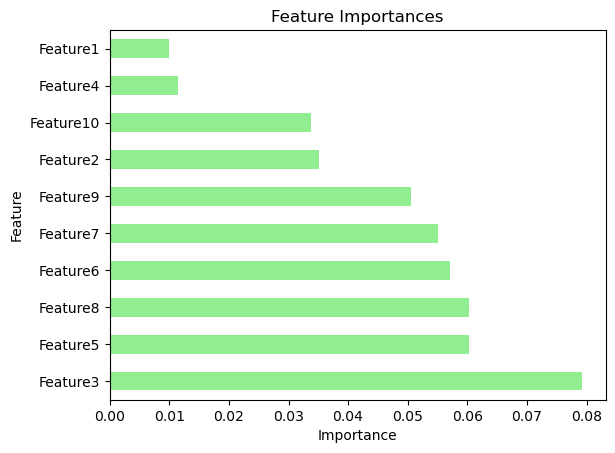

In [185]:
# Calculate feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame(sorted(zip(importances, feature_names), reverse=True), columns=['Feature Importances', 'Feature'])

# Set the feature names as the index
importances_df.set_index('Feature', inplace=True)

# Plot feature importances
importances_df.plot(kind='barh', color='lightgreen', title='Feature Importances', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()